#### Performing the Standard Verification Routine with the Caravagna-J-Theor-Biol-2010 publication.

In [1]:
import sys
import os

import numpy as np

from biosimulator_processes.io import read_report_outputs

sys.path.insert(0, '..')

Available processes:
[ 'console-emitter',
  'ram-emitter',
  'composite',
  'cobra',
  'copasi',
  'tellurium',
  'amici']
Available processes:
[ 'console-emitter',
  'ram-emitter',
  'composite',
  'cobra',
  'copasi',
  'tellurium',
  'amici',
  'copasi-step',
  'tellurium-step',
  'amici-step',
  'plotter',
  'plotter2d']


In [2]:
omex_dir = '../examples/sbml-core/Caravagna-J-Theor-Biol-2010-tumor-suppressive-oscillations'
os.path.exists(omex_dir)

True

In [3]:
# read "ground truth" output aka that which is PUBLISHED as the omex dir (including reports). Publication itself is a Validation Phase, according to the Standard Validation Routine

published_outputs = read_report_outputs(os.path.join(omex_dir, 'reports.h5'))

In [4]:
# published outputs are easily serializable

published_outputs.to_dict()

{'report_path': '../examples/sbml-core/Caravagna-J-Theor-Biol-2010-tumor-suppressive-oscillations/reports.h5',
 'data': [{'dataset_label': 'time',
   'data': array([0.000e+00, 2.000e-01, 4.000e-01, ..., 9.996e+02, 9.998e+02,
          1.000e+03])},
  {'dataset_label': 'T',
   'data': array([  1.        ,   1.03663447,   1.07461102, ..., 294.20912519,
          304.52170256, 315.19840046])},
  {'dataset_label': 'E',
   'data': array([1.00000000e+00, 9.98078674e-01, 9.96317603e-01, ...,
          2.45472790e+03, 2.44123741e+03, 2.42786947e+03])},
  {'dataset_label': 'I',
   'data': array([1.00000000e+00, 1.35378335e-01, 1.83660859e-02, ...,
          3.18793211e+01, 3.27198886e+01, 3.35804183e+01])}]}

In [5]:
from biosimulator_processes.steps.ode_simulation import CopasiStep
from biosimulator_processes.api.instance import run_copasi_step_from_omex
from process_bigraph import Composite


class Workflow(Composite):
    def __init__(self, config=None, core=None):
        super().__init__(config, core)

In [6]:
copasi_results = run_copasi_step_from_omex(omex_dir)

[0.0, 0.2, 0.4, 199.8, 200]
../examples/sbml-core/Caravagna-J-Theor-Biol-2010-tumor-suppressive-oscillations/Caravagna2010.xml
True
../examples/sbml-core/Caravagna-J-Theor-Biol-2010-tumor-suppressive-oscillations/reports.h5


/Users/alexanderpatrie/Desktop/repos/biosimulator-processes/biosimulator_processes/steps/ode_simulation.py:238: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



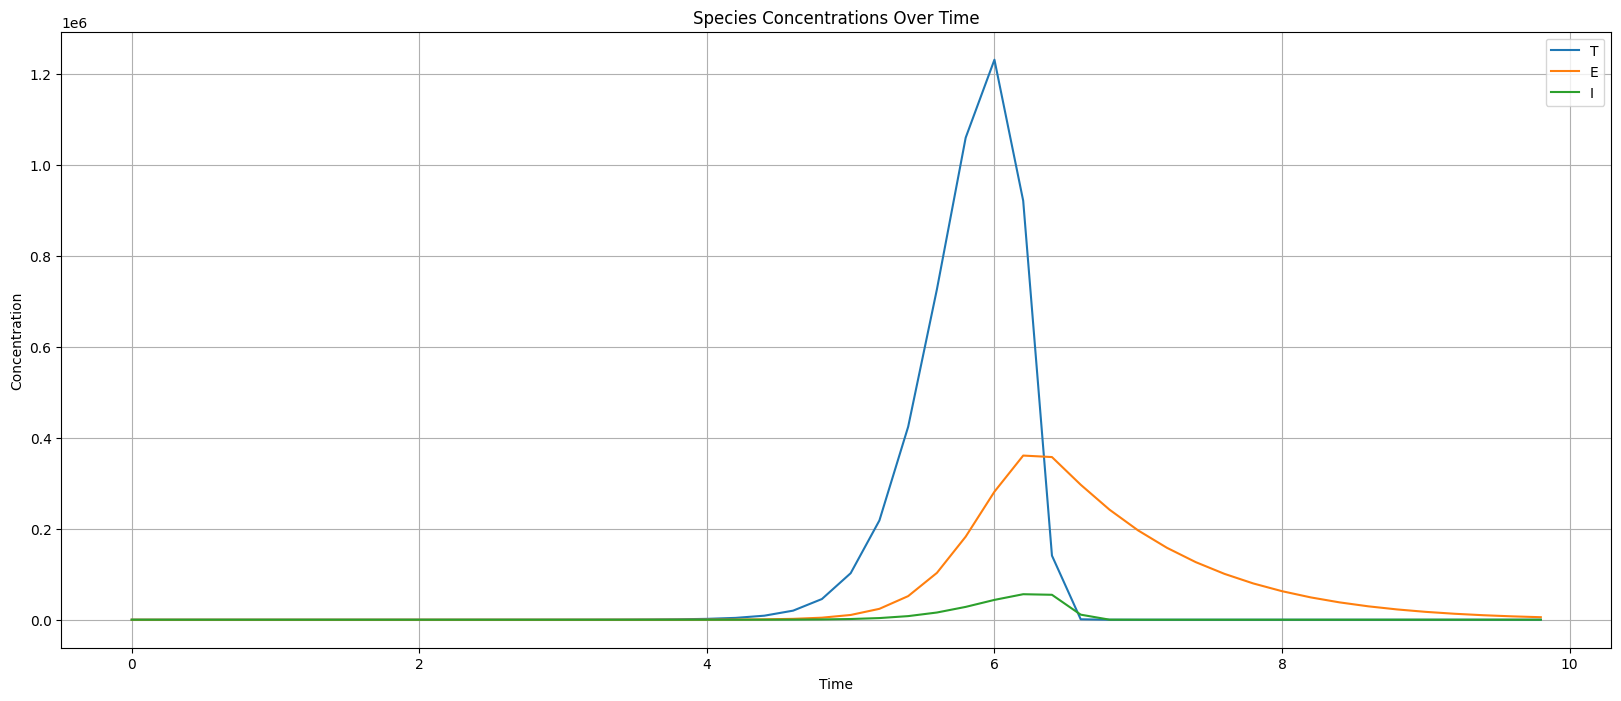

In [18]:
copasi_results.plot(50)

In [13]:
y = np.array([o for o in copasi_results.floating_species.values()])

In [14]:
y.shape

(3, 5001)

In [15]:
x = CopasiStep(archive_dirpath=omex_dir).t 

[0.0, 0.2, 0.4, 199.8, 200]
../examples/sbml-core/Caravagna-J-Theor-Biol-2010-tumor-suppressive-oscillations/Caravagna2010.xml
True
../examples/sbml-core/Caravagna-J-Theor-Biol-2010-tumor-suppressive-oscillations/reports.h5


In [16]:
x

array([0.000e+00, 2.000e-01, 4.000e-01, ..., 9.996e+02, 9.998e+02,
       1.000e+03])

ValueError: x and y must have same first dimension, but have shapes (5001,) and (3, 5001)

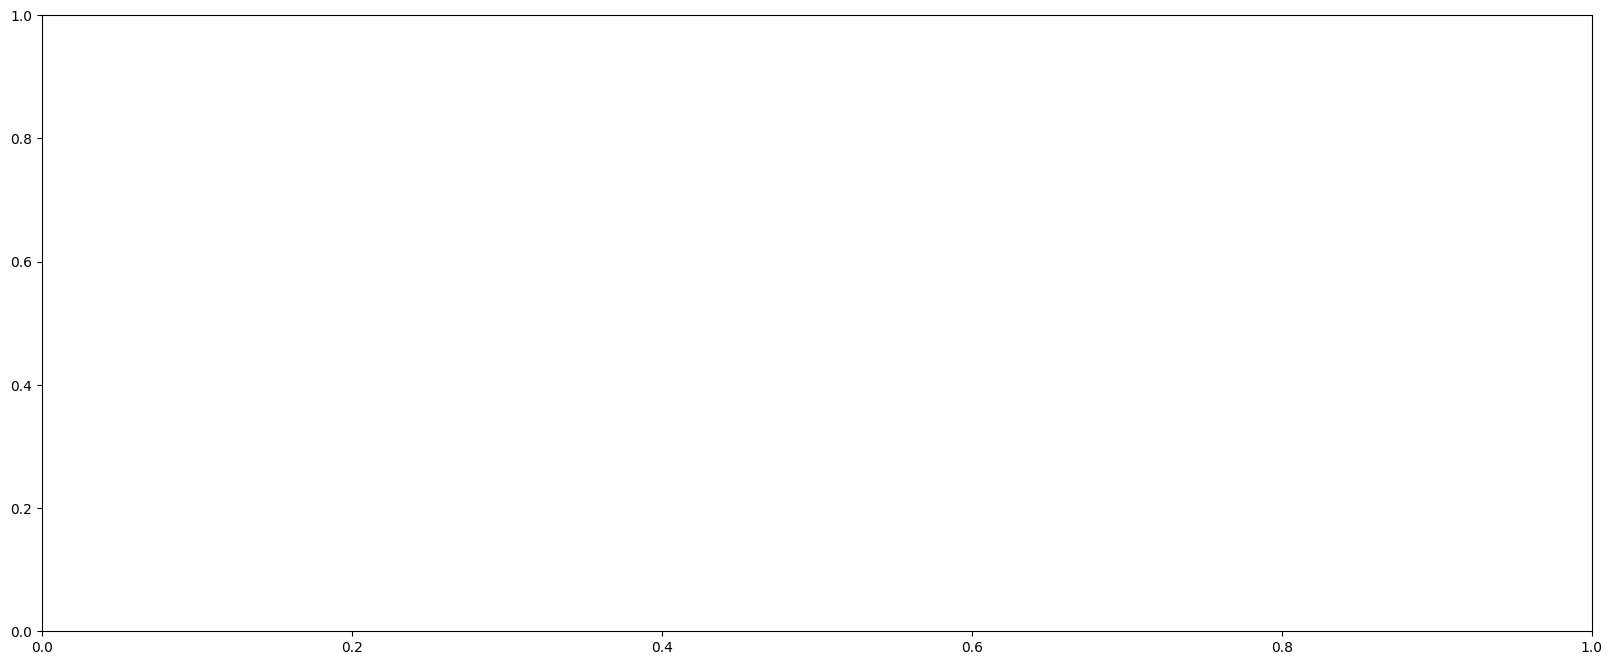

In [17]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(20, 8))
plt.plot(x, y)
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Species Concentrations Over Time')
plt.legend()
plt.grid(True)

In [19]:
published_outputs

BiosimulationsRunOutputData(report_path='../examples/sbml-core/Caravagna-J-Theor-Biol-2010-tumor-suppressive-oscillations/reports.h5', data=[BiosimulationsReportOutput(dataset_label='time', data=array([0.000e+00, 2.000e-01, 4.000e-01, ..., 9.996e+02, 9.998e+02,
       1.000e+03])), BiosimulationsReportOutput(dataset_label='T', data=array([  1.        ,   1.03663447,   1.07461102, ..., 294.20912519,
       304.52170256, 315.19840046])), BiosimulationsReportOutput(dataset_label='E', data=array([1.00000000e+00, 9.98078674e-01, 9.96317603e-01, ...,
       2.45472790e+03, 2.44123741e+03, 2.42786947e+03])), BiosimulationsReportOutput(dataset_label='I', data=array([1.00000000e+00, 1.35378335e-01, 1.83660859e-02, ...,
       3.18793211e+01, 3.27198886e+01, 3.35804183e+01]))])

In [22]:
len(copasi_results.floating_species['T']), len(published_outputs.data[1].data)

(5001, 5001)